# Exercise 0 : Import Libraries

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

# Exercise 1 : Read the Dataset

In [10]:
df = pd.read_csv("heart_disease.csv")
df 

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 2 : Drop Unnamed: 0 column

In [11]:
df = df.loc[:,"age":]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
df.shape

(303, 14)

In [14]:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,3.0,132.0,247.0,0.0,1.0,150.0,0.0,1.0,2.0,0.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,0.0
min,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0
25%,48.0,0.0,3.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0
50%,56.0,1.0,3.0,130.0,241.0,0.0,1.0,153.0,0.0,1.0,2.0,0.0
75%,61.0,1.0,4.0,140.0,275.0,0.0,2.0,166.0,1.0,2.0,2.0,1.0
max,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,3.0,1.0


In [15]:
for i in  df.columns:
    print(i)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
present


In [16]:
df["ca"].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [17]:
df["thal"].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

# Exercise 4 : Handle missing data

In [18]:
null_row = df.loc[(df['ca']=="?")]
null_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [19]:
null_row = df.loc[(df['thal']=="?")]
null_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


In [20]:
df['thal'].loc[(df['thal']=="?")]=np.NaN
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
present     0
dtype: int64

In [21]:
df['ca'].loc[(df['ca']=="?")]=np.NaN
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
present     0
dtype: int64

In [22]:
df =df.dropna()
print(df.shape)
df.isna().sum()

(297, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [23]:
df["ca"] =df["ca"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    object 
 13  present   297 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 34.8+ KB


In [24]:
df["thal"] =df["thal"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  present   297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

In [25]:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0
mean,55.0,1.0,3.0,132.0,247.0,0.0,1.0,150.0,0.0,1.0,2.0,1.0,5.0,0.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,2.0,0.0
min,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0,3.0,0.0
25%,48.0,0.0,3.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,3.0,0.0
50%,56.0,1.0,3.0,130.0,243.0,0.0,1.0,153.0,0.0,1.0,2.0,0.0,3.0,0.0
75%,61.0,1.0,4.0,140.0,276.0,0.0,2.0,166.0,1.0,2.0,2.0,1.0,7.0,1.0
max,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,3.0,3.0,7.0,1.0


# not included 
## age , sex , exang, fbs , slope , present , restecg , cp ,ca

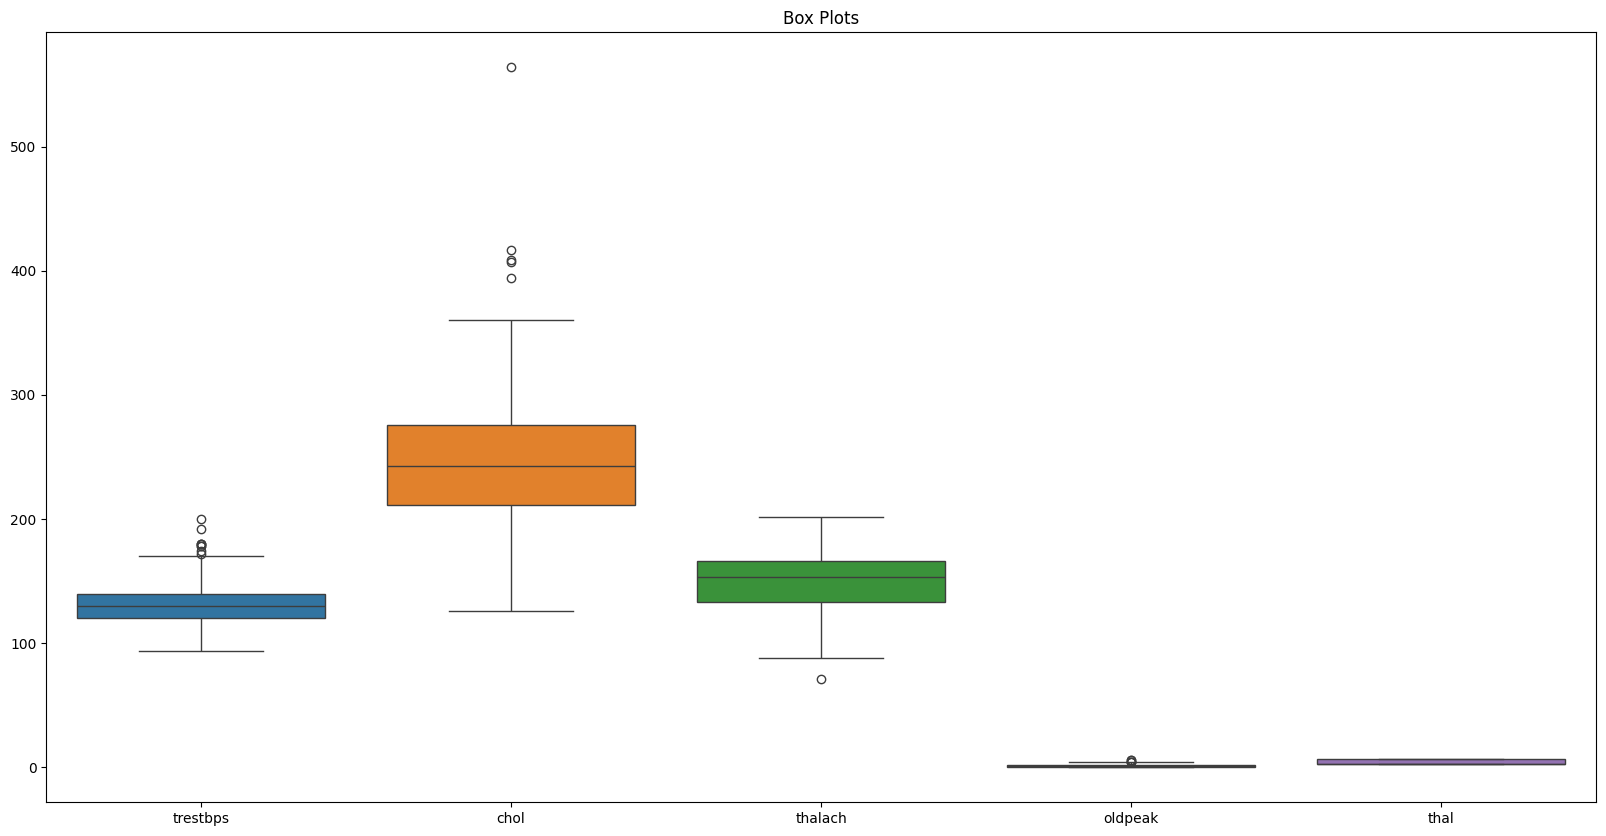

In [26]:
data = [
    df['trestbps'], df['chol'], df['thalach'],
    df['oldpeak'], df['thal']
]

labels = [
    'trestbps', 'chol', 'thalach', 'oldpeak', 'thal'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

In [27]:
def outlier(Q1,Q3):
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    higger = Q3 + (1.5 * IQR)
    print("lower",abs(lower))
    print("higger",abs(higger))
print("chol :")
outlier(211,276)
print("_"*30)
print("trestbps :")
outlier(120,140)

chol :
lower 113.5
higger 373.5
______________________________
trestbps :
lower 90.0
higger 170.0


In [28]:
df =df[(df["chol"]>113.5)&(df["chol"]<373.5)]
df =df[(df["trestbps"]>90)&(df["trestbps"]<170)]

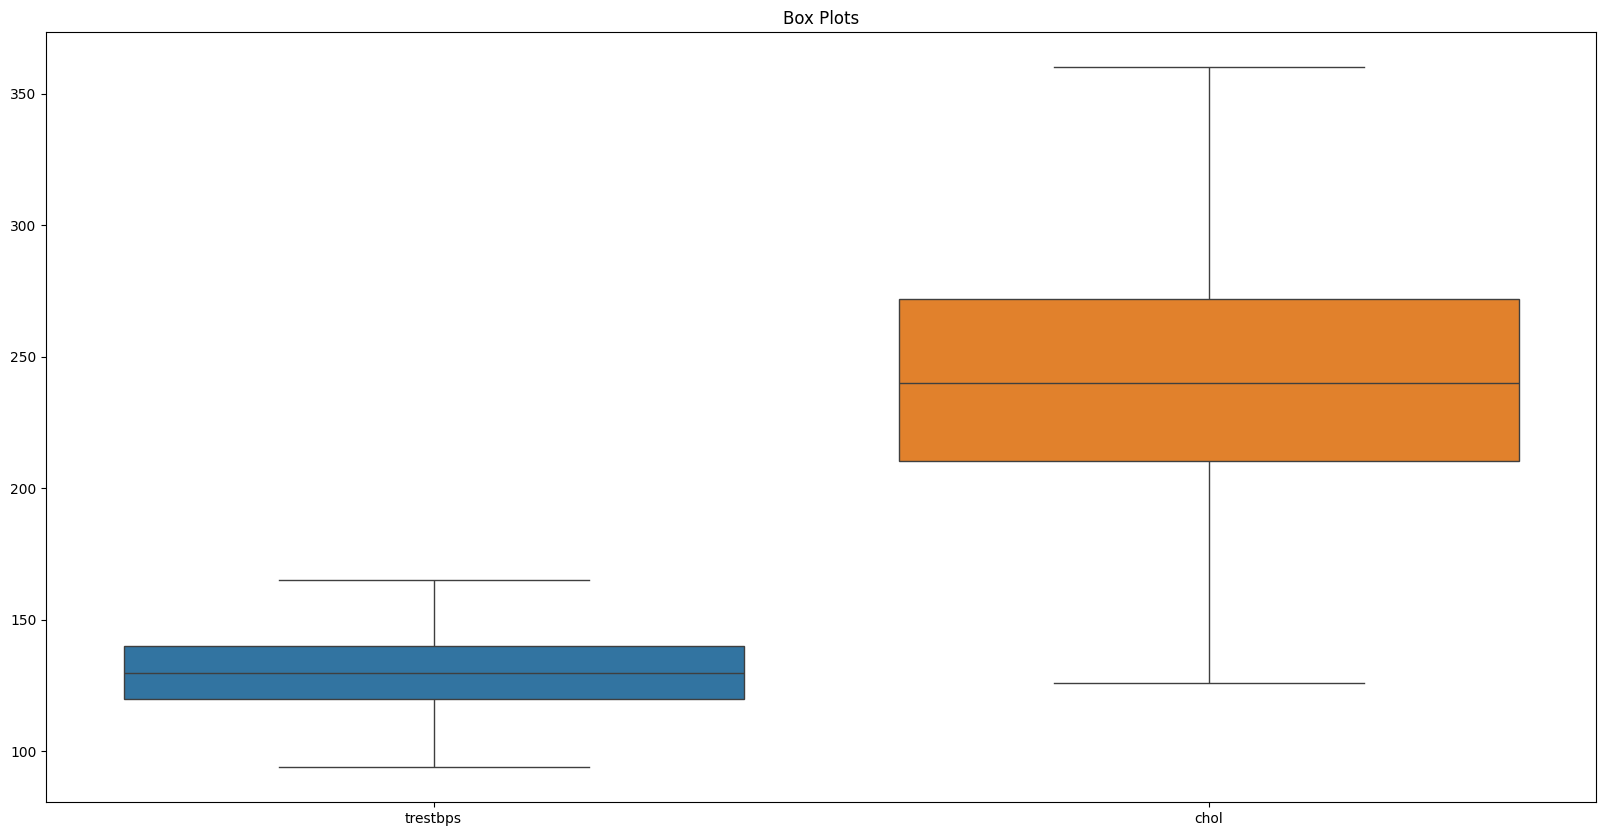

In [29]:
data = [
    df['trestbps'], df['chol']
]

labels = [
    'trestbps', 'chol'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

<Axes: >

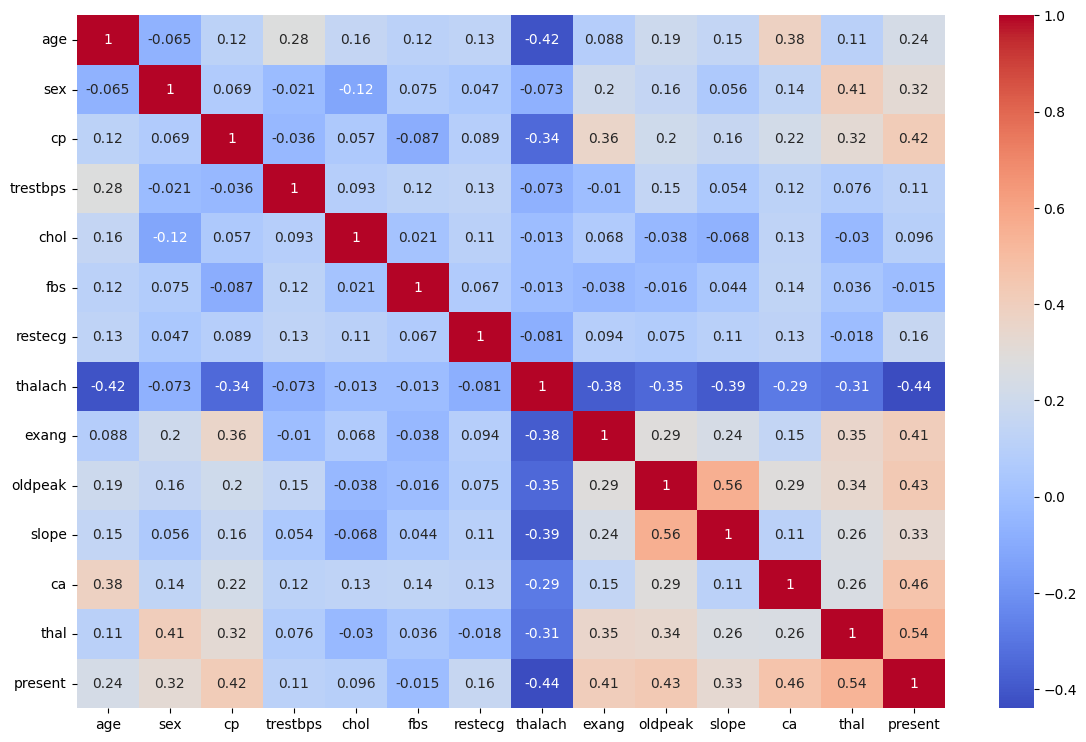

In [30]:
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Exercise 8 : X and Y split, then train and test split

In [31]:
from sklearn.model_selection import train_test_split
X= df.loc[:,:"thal"]
y = df.loc[:,["present"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
print((y_train == 1).sum())
print((y_train == 0).sum())

present    99
dtype: int64
present    124
dtype: int64


# Exercise 9 : Train the model

In [33]:
logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_p=logmodel.predict(X_test)

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [36]:
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [37]:
print(f'The classification report :-\n{confusion_matrix(y_test, y_p)}')

The classification report :-
[[27  2]
 [ 8 19]]


In [38]:
print("score of the training data :",logmodel.score(X_train,y_train))
print("score of the training data :",logmodel.score(X_test,y_test))
print(f'The accuracy of the model : {accuracy_score(y_test, y_p)}')
print(f'The Sensitivity of the model : {recall_score(y_test, y_p)}')
Specificity= 19/(19+2)
print(f'The Specificity of the model : {Specificity}')
print(f'The Sensitivity/Specificity of the model : {recall_score(y_test, y_p)/Specificity}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_p)}')

score of the training data : 0.8654708520179372
score of the training data : 0.8214285714285714
The accuracy of the model : 0.8214285714285714
The Sensitivity of the model : 0.7037037037037037
The Specificity of the model : 0.9047619047619048
The Sensitivity/Specificity of the model : 0.7777777777777778
The AUC-ROC of the model : 0.8173690932311622


# Exercise 11 : Find the wights and y intercept

In [39]:
wight = logmodel.coef_
bias = logmodel.intercept_
print(wight, bias)

[[-0.04300319  0.96938752  0.5929437   0.01013708  0.00566883 -0.47804003
   0.32133776 -0.04102771  0.28639151  0.38002941  0.00622091  0.9034588
   0.37856837]] [-0.14304295]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

# Ridge

In [40]:
from sklearn.linear_model import Ridge
model_Ridge_0= Ridge(alpha=0)
model_Ridge_0.fit(X_train, y_train)

Ridge(alpha=0)

In [73]:
def conver(x):
    count = 0
    for i in x :
        if i[0] < 0.5:
            x[count] = 0
        else:
            x[count] = 1
        count+=1
    return x     

In [121]:
y_pred_Ridge_0 = model_Ridge_0.predict(X_test)
y_pred_Ridge_0= conver(y_pred_Ridge_0)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Ridge_0)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Ridge_0))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.86      0.70      0.78        27

    accuracy                           0.80        56
   macro avg       0.81      0.80      0.80        56
weighted avg       0.81      0.80      0.80        56

AUC-ROC score: 0.8001277139208174


In [75]:
model_Ridge_1= Ridge(alpha=1)
model_Ridge_1.fit(X_train, y_train)

Ridge(alpha=1)

In [120]:
y_pred_Ridge_1 = model_Ridge_1.predict(X_test)
y_pred_Ridge_1= conver(y_pred_Ridge_1)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Ridge_1)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Ridge_1))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.90      0.70      0.79        27

    accuracy                           0.82        56
   macro avg       0.84      0.82      0.82        56
weighted avg       0.84      0.82      0.82        56

AUC-ROC score: 0.8173690932311622


In [99]:
model_Ridge_2= Ridge(alpha=250)
model_Ridge_2.fit(X_train, y_train)

Ridge(alpha=250)

In [122]:
y_pred_Ridge_2 = model_Ridge_2.predict(X_test)
y_pred_Ridge_2= conver(y_pred_Ridge_2)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Ridge_2)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Ridge_2))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.88      0.56      0.68        27

    accuracy                           0.75        56
   macro avg       0.79      0.74      0.74        56
weighted avg       0.78      0.75      0.74        56

AUC-ROC score: 0.7432950191570882


# Lasso

In [106]:
def conver_l(x):
    count = 0
    for i in x :
        if i < 0.5:
            x[count] = 0
        else:
            x[count] = 1
        count+=1
    return x     

In [101]:
from sklearn.linear_model import Lasso
model_Lasso_0= Lasso(alpha=0)
model_Lasso_0.fit(X_train, y_train)

Lasso(alpha=0)

In [123]:
y_pred_Lasso_0 = model_Lasso_0.predict(X_test)
y_pred_Lasso_0= conver_l(y_pred_Lasso_0)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Lasso_0)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Lasso_0))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           1       0.75      0.33      0.46        27

    accuracy                           0.62        56
   macro avg       0.67      0.61      0.59        56
weighted avg       0.67      0.62      0.59        56

AUC-ROC score: 0.6149425287356322


In [109]:
model_Lasso_1= Lasso(alpha=1)
model_Lasso_1.fit(X_train, y_train)

Lasso(alpha=1)

In [124]:
y_pred_Lasso_1 = model_Lasso_1.predict(X_test)
y_pred_Lasso_1= conver_l(y_pred_Lasso_1)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Lasso_1)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Lasso_1))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           1       0.75      0.33      0.46        27

    accuracy                           0.62        56
   macro avg       0.67      0.61      0.59        56
weighted avg       0.67      0.62      0.59        56

AUC-ROC score: 0.6149425287356322


In [112]:
model_Lasso_2= Lasso(alpha=2)
model_Lasso_2.fit(X_train, y_train)

Lasso(alpha=2)

In [125]:
y_pred_Lasso_2 = model_Lasso_2.predict(X_test)
y_pred_Lasso_2= conver_l(y_pred_Lasso_2)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_Lasso_2)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_Lasso_2))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.56      0.86      0.68        29
           1       0.64      0.26      0.37        27

    accuracy                           0.57        56
   macro avg       0.60      0.56      0.52        56
weighted avg       0.59      0.57      0.53        56

AUC-ROC score: 0.5606641123882503


# Elastic Net

In [114]:
from sklearn.linear_model import ElasticNet
model_ElasticNet_0= ElasticNet(alpha=0)
model_ElasticNet_0.fit(X_train, y_train)

ElasticNet(alpha=0)

In [126]:
y_pred_ElasticNet_0 = model_ElasticNet_0.predict(X_test)
y_pred_ElasticNet_0= conver_l(y_pred_ElasticNet_0)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_ElasticNet_0)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_ElasticNet_0))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.86      0.70      0.78        27

    accuracy                           0.80        56
   macro avg       0.81      0.80      0.80        56
weighted avg       0.81      0.80      0.80        56

AUC-ROC score: 0.8001277139208174


In [116]:
model_ElasticNet_1= ElasticNet(alpha=1)
model_ElasticNet_1.fit(X_train, y_train)

ElasticNet(alpha=1)

In [127]:
y_pred_ElasticNet_1 = model_ElasticNet_1.predict(X_test)
y_pred_ElasticNet_1= conver_l(y_pred_ElasticNet_1)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_ElasticNet_1)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_ElasticNet_1))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           1       0.75      0.33      0.46        27

    accuracy                           0.62        56
   macro avg       0.67      0.61      0.59        56
weighted avg       0.67      0.62      0.59        56

AUC-ROC score: 0.6149425287356322


In [118]:
model_ElasticNet_0_5= ElasticNet(alpha=0.5)
model_ElasticNet_0_5.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [128]:
y_pred_ElasticNet_0_5 = model_ElasticNet_0_5.predict(X_test)
y_pred_ElasticNet_0_5= conver_l(y_pred_ElasticNet_0_5)
print(f'The confusion matrix :-\n{classification_report(y_test, y_pred_ElasticNet_0_5)}')
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_ElasticNet_0_5))

The confusion matrix :-
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           1       0.75      0.33      0.46        27

    accuracy                           0.62        56
   macro avg       0.67      0.61      0.59        56
weighted avg       0.67      0.62      0.59        56

AUC-ROC score: 0.6149425287356322
